># Cacluate seafloor electric ($\mathcal{E}_d$) and magnetic ($\mathcal{H}_d$) fields given a seasurface magnetic field ($\mathcal{H}_o$). This notebook provieds basic calculation of transfer functions needed to calculate $\frac{\mathcal{E}_d}{\mathcal{H}_o}$ and $\frac{\mathcal{H}_d}{\mathcal{H}_o}$ assuming 1D Earth conductivity model.

>- September, 2021. S. Chakraborty (<shibaji7@vt.edu>)

>> ### Simplified 1D Earth conductivity model: conductivity changes with depth only
The models used in this study are SU1 and BM1 ocean model. Following equations from [Boteler et al. (2003)](https://link.springer.com/article/10.1007%2Fs00024-003-2372-6) are used in this study:
$$\frac{\mathcal{E}_d}{\mathcal{H}_o}=Z_d\frac{1}{\cosh{kd}+\frac{Z_d}{Z}\sinh{kd}}$$
$$\frac{\mathcal{H}_d}{\mathcal{H}_o}=\frac{1}{\cosh{kd}+\frac{Z_d}{Z}\sinh{kd}}$$
where: $k=\frac{1+i}{\delta}$, $\delta=\sqrt{\frac{2\rho_s}{\omega\mu_0}}$, thus $kd=(1+i)\frac{d}{\delta}$. Also, $Z,Z_d\sim$ are the characteristic impedence of ocean and seafloor, with $Z=\left(\frac{i\omega\mu_0}{\sigma_s}\right)^{\frac{1}{2}}$, $\sigma_s=\frac{1}{\rho_s}$. $\rho_s$, $d$ are the ocean resistivity and depth, respectively.

>> ## This notebook provides examples of following following operations
* Plots of various transfer functions (TFs), e.g. $\frac{E_d}{E_o}$, $\frac{E_d}{H_o}$, $\frac{H_d}{H_o}$
* Parameters: Ocean depth ($_{ocean}$), sea conductivity ($\rho_s$), seafloor conductivity ($\rho_e$)
* Variations of the TF with frequency, ocean depth, and other parameters under consideration
* Caclulations of seafloor impedance ($Z_d$) considering the Earth as uniform spehere along depth
* Caclulations of seafloor impedance ($Z_d$) considering the Earth as layered spehere along depth

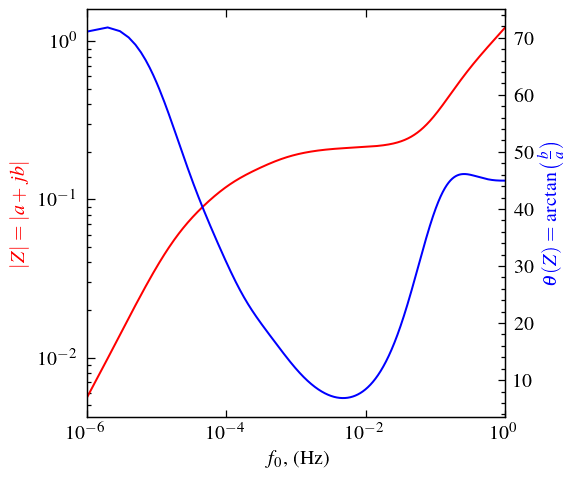

In [1]:
# Import required packages
import bezpy
import matplotlib.pyplot as plt
plt.style.use(['science','ieee'])
import numpy as np
from scipy import constants as C
from models import BEZpyClass
import pandas as pd

flim = [1e-6, 1e0]
freqs = np.linspace(flim[0], flim[1], int(flim[1]/flim[0])+1)
# Import 1D sea-earth model
site = bezpy.mt.read_1d_usgs_profile("../data/ocean_model_BM1.txt")
Z = site.calcZ(freqs)[1]
fig = plt.figure(dpi=180, figsize=(3, 3))
ax = fig.add_subplot(111)
ax.loglog(freqs, np.absolute(Z), "r", lw=0.8, ls="-")
ax.set_xlabel(r"$f_0$, (Hz)")
ax.set_ylabel(r"$|Z|=|a+jb|$", color="r")
ax.set_xlim(flim)
ax = ax.twinx()
ax.set_xlim(flim)
ax.semilogx(freqs, np.rad2deg(np.angle(Z)), "b", lw=0.8, ls="-")
_ = ax.set_ylabel(r"$\theta(Z)=\arctan{\left(\frac{b}{a}\right)}$", color="b")

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


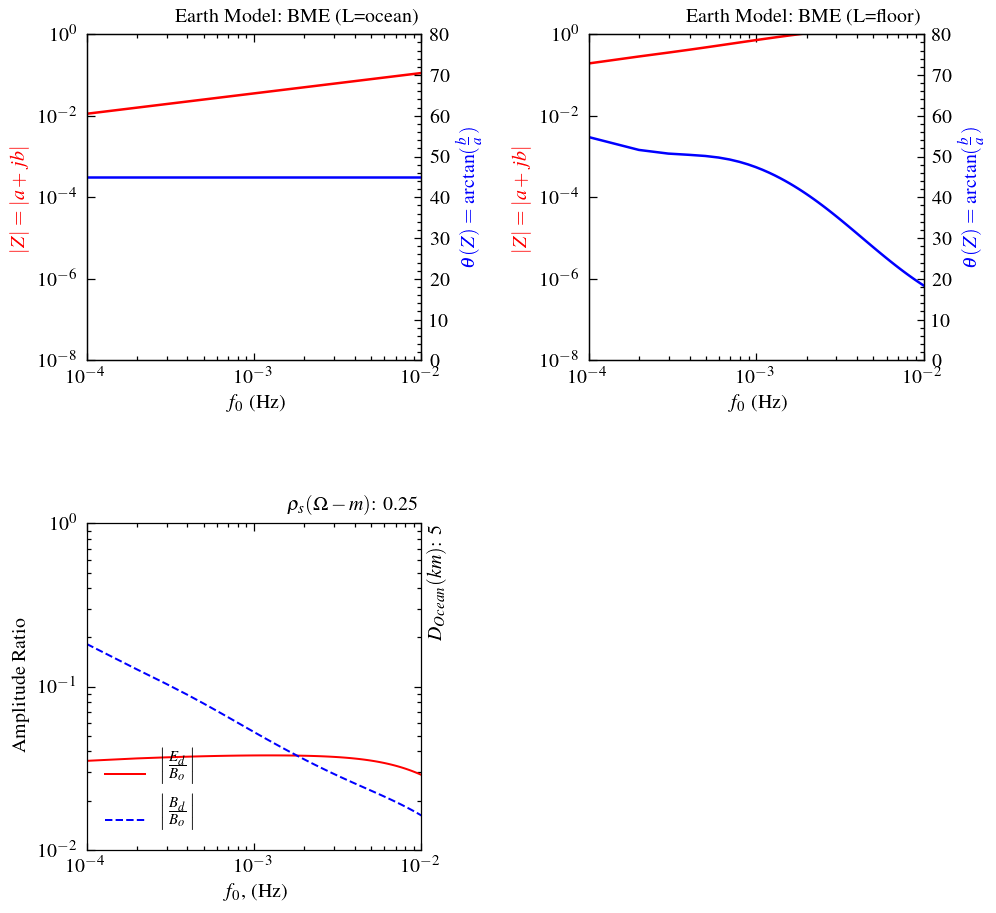

In [2]:
######################################################
# Test case - 1: Create Ben's test model with 
#                modified all the Earth's layer same
#                registivity values (uniform Earth).
######################################################
lox = BEZpyClass(model_name="BME", flim=[1e-4,1e-2])
fig = plt.figure(dpi=180, figsize=(6, 6))
lox.plot_impedance(fig.add_subplot(221), layer="ocean")
lox.plot_impedance(fig.add_subplot(222), layer="floor")
tfx = lox.calcTF(ax=fig.add_subplot(223))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

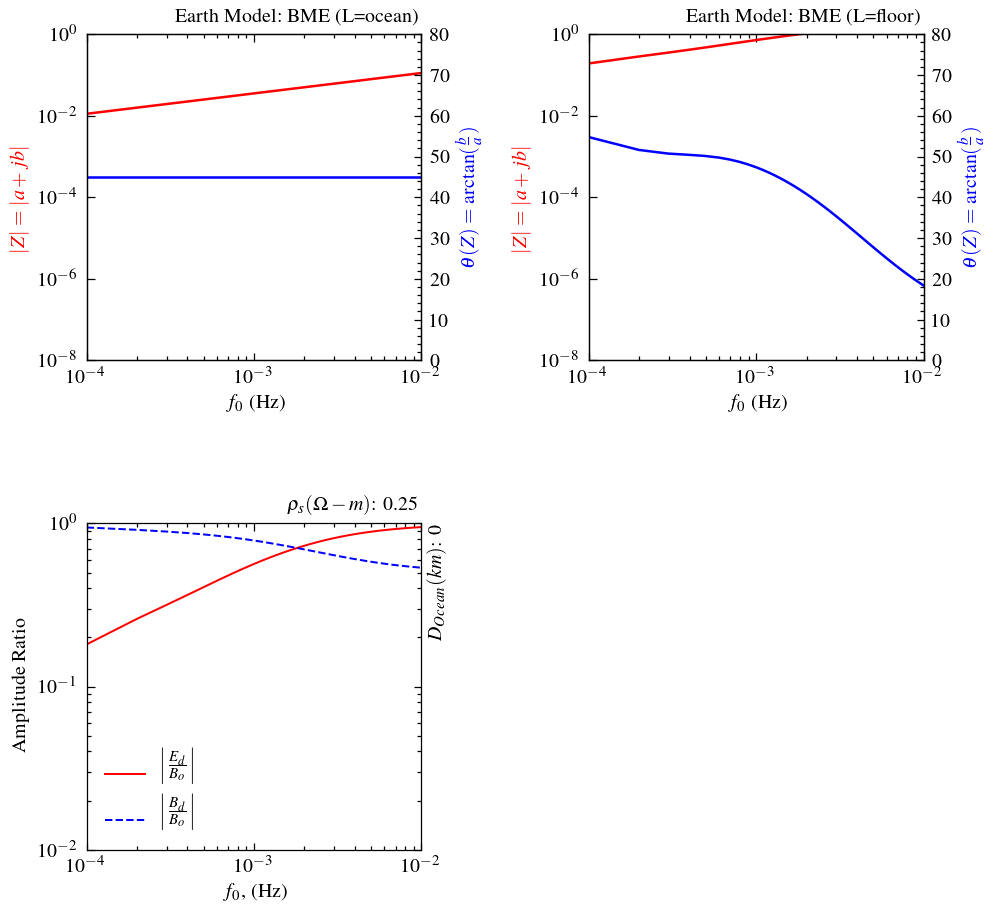

In [3]:
loy = BEZpyClass(model_name="BME",ocean_model={"depth":1e2, "rho":0.25}, flim=[1e-4,1e-2])
#loy.site.thicknesses[0] = 1e2
#lox.site.resistivities[0] = 0.25
fig = plt.figure(dpi=180, figsize=(6, 6))
loy.plot_impedance(fig.add_subplot(221), layer="ocean")
loy.plot_impedance(fig.add_subplot(222), layer="floor")
tfy = loy.calcTF(ax=fig.add_subplot(223))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

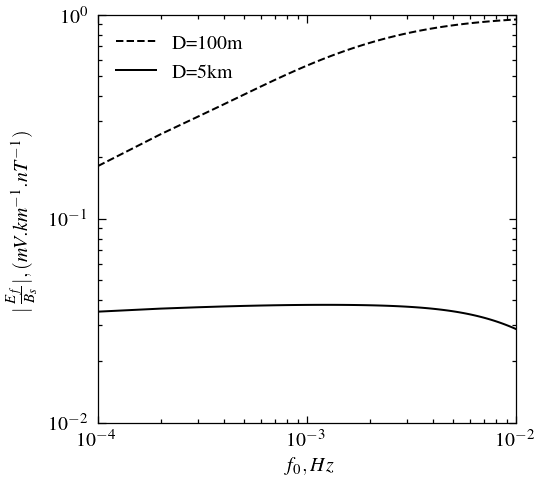

In [4]:
fig = plt.figure(dpi=180, figsize=(3, 3))
ax = fig.add_subplot(111)
ax.loglog(loy.freqs, np.absolute(tfy["Ed2Ho"]), "k", lw=0.8, ls="--", label="D=100m")
ax.loglog(lox.freqs, np.absolute(tfx["Ed2Ho"]), "k", lw=0.8, ls="-", label="D=5km")
ax.set_xlabel(r"$f_0, Hz$")
ax.set_ylabel(r"$|\frac{E_f}{B_s}|, (mV.km^{-1}.nT^{-1})$")
ax.set_xlim(1e-4,1e-2)
ax.set_ylim(1e-2, 1e0)
ax.legend(loc=0)

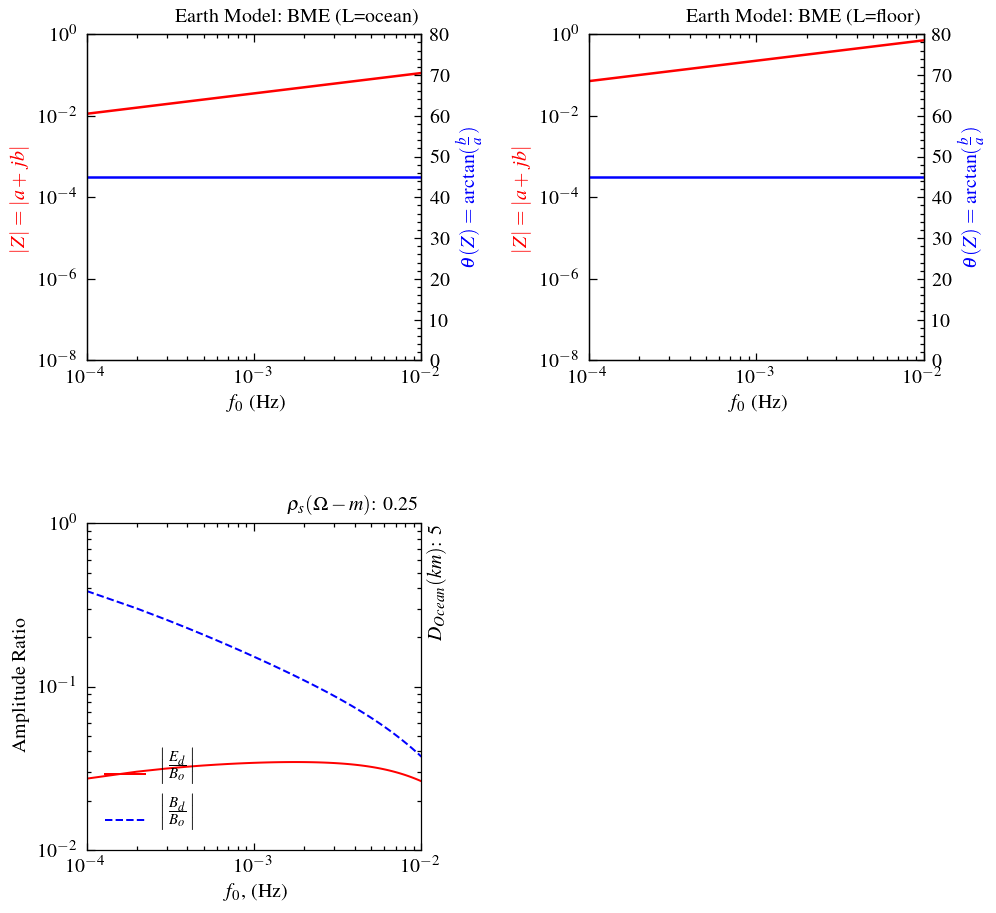

In [5]:
######################################################
# Test case - 2: Create Ben's test model with 
#                modified all the Earth's layer same
#                registivity values (uniform Earth)
#                and sea layer = 5km to replicate 
#                Boteler et al. (2003) results.
######################################################
lox = BEZpyClass(model_name="BME", flim=[1e-4,1e-2])
#lox.site.resistivities[0] = 1/3
lox.site.resistivities[:] = 10.*np.ones(len(lox.site.resistivities[:]))
fig = plt.figure(dpi=180, figsize=(6, 6))
lox.plot_impedance(fig.add_subplot(221), layer="ocean")
lox.plot_impedance(fig.add_subplot(222), layer="floor")
tfx = lox.calcTF(ax=fig.add_subplot(223))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

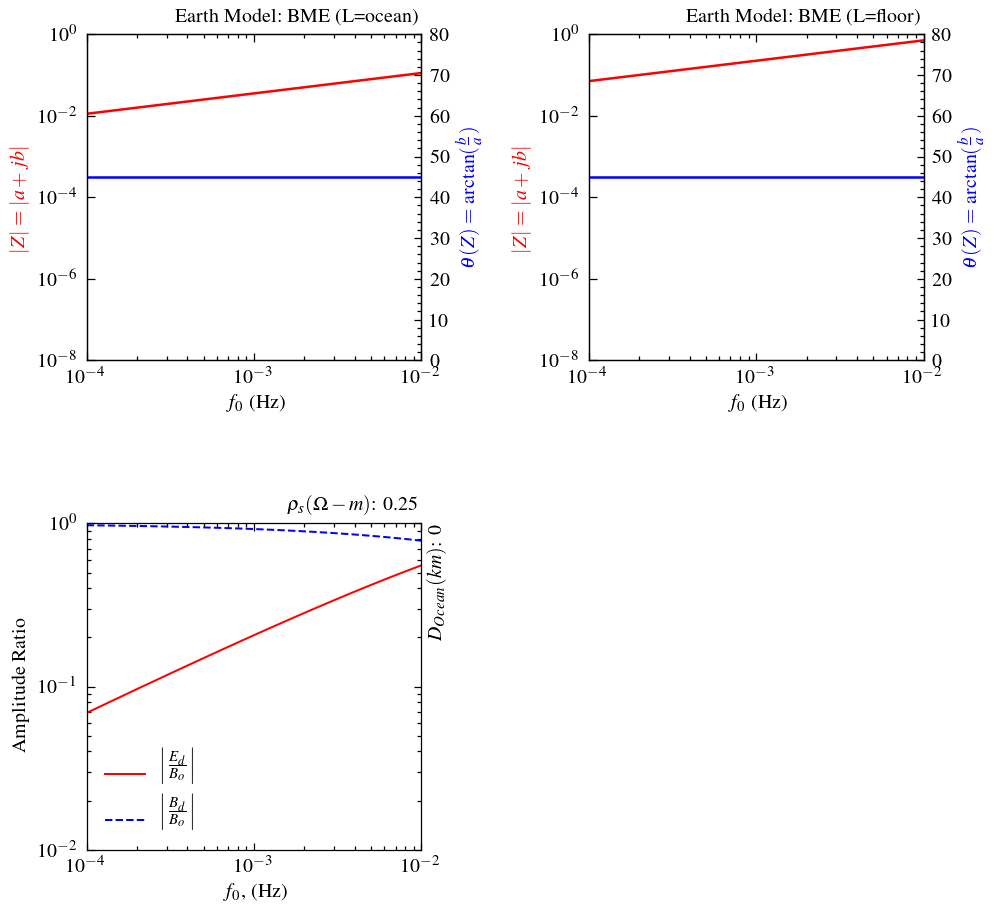

In [6]:
loy = BEZpyClass(model_name="BME", ocean_model={"depth":1e2, "rho":0.25}, flim=[1e-4,1e-2])
#loy.site.resistivities[0] = 0.25
loy.site.resistivities[:] = 10.*np.ones(len(loy.site.resistivities[:]))
fig = plt.figure(dpi=180, figsize=(6, 6))
loy.plot_impedance(fig.add_subplot(221), layer="ocean")
loy.plot_impedance(fig.add_subplot(222), layer="floor")
tfy = loy.calcTF(ax=fig.add_subplot(223))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

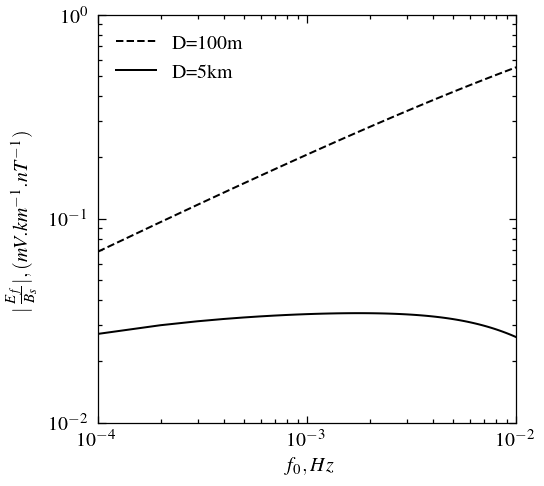

In [7]:
fig = plt.figure(dpi=180, figsize=(3, 3))
ax = fig.add_subplot(111)
ax.loglog(loy.freqs, np.absolute(tfy["Ed2Ho"]), "k", lw=0.8, ls="--", label="D=100m")
ax.loglog(lox.freqs, np.absolute(tfx["Ed2Ho"]), "k", lw=0.8, ls="-", label="D=5km")
ax.set_xlabel(r"$f_0, Hz$")
ax.set_ylabel(r"$|\frac{E_f}{B_s}|, (mV.km^{-1}.nT^{-1})$")
ax.set_xlim(1e-4,1e-2)
ax.set_ylim(1e-2, 1e0)
ax.legend(loc=0)

In [8]:
def draw_table(q, fq):
    Kfm = q.getTF(freqs=fq)
    o = pd.DataFrame()
    o["fm (Hz)"], o["Amplitude |Km| (mV/km/nT)"], o["Phase, tm, (deg)"] = fq, np.absolute(Kfm), np.rad2deg(np.angle(Kfm))
    o["real"], o["imag"] = Kfm.real, Kfm.imag
    o.index.name = "m"
    return o.copy()

fm = np.array([0.00009259, 0.00020833, 0.00047619, 0.00111111, 0.00238095, 0.00555555, 0.025])
y = draw_table(loy, fm)
print(y)

    fm (Hz)  Amplitude |Km| (mV/km/nT)  Phase, tm, (deg)      real      imag
m                                                                           
0  0.000093                   0.066415         43.646524  0.048059  0.045840
1  0.000208                   0.098428         42.993293  0.071994  0.067119
2  0.000476                   0.146083         42.019570  0.108527  0.097786
3  0.001111                   0.216834         40.570333  0.164709  0.141025
4  0.002381                   0.305517         38.745983  0.238281  0.191213
5  0.005556                   0.438435         35.989891  0.354747  0.257643
6  0.025000                   0.769195         28.950302  0.673076  0.372329


In [9]:
x = draw_table(lox, fm)
print(x)

    fm (Hz)  Amplitude |Km| (mV/km/nT)  Phase, tm, (deg)      real      imag
m                                                                           
0  0.000093                   0.026889         15.125344  0.025957  0.007016
1  0.000208                   0.030207          9.847229  0.029762  0.005166
2  0.000476                   0.032687          3.973142  0.032608  0.002265
3  0.001111                   0.034173         -4.077502  0.034087 -0.002430
4  0.002381                   0.034284        -15.920199  0.032969 -0.009404
5  0.005556                   0.031560        -40.223998  0.024097 -0.020381
6  0.025000                   0.013210       -135.000000 -0.009341 -0.009341


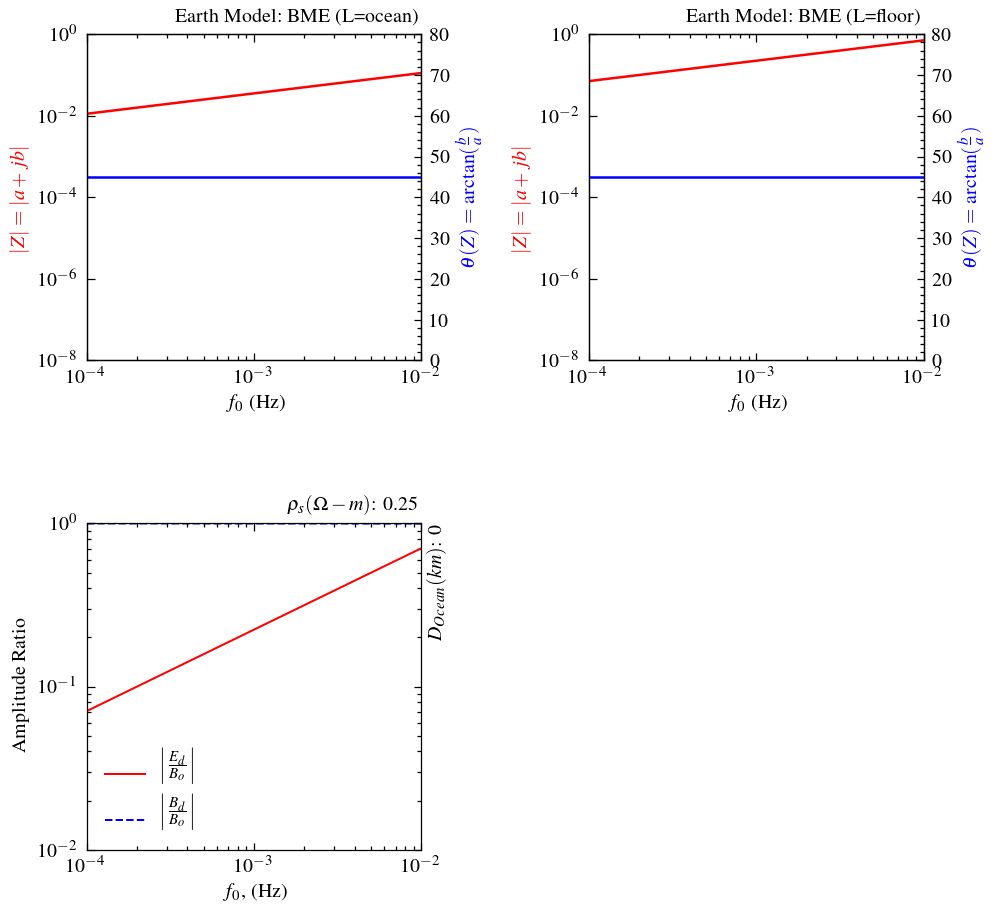

In [10]:
loy = BEZpyClass(model_name="BME", ocean_model={"depth":1, "rho":0.25}, flim=[1e-4,1e-2])
#loy.site.resistivities[0] = 0.25
loy.site.resistivities[:] = 10.*np.ones(len(loy.site.resistivities[:]))
fig = plt.figure(dpi=180, figsize=(6, 6))
loy.plot_impedance(fig.add_subplot(221), layer="ocean")
loy.plot_impedance(fig.add_subplot(222), layer="floor")
tfy = loy.calcTF(ax=fig.add_subplot(223))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

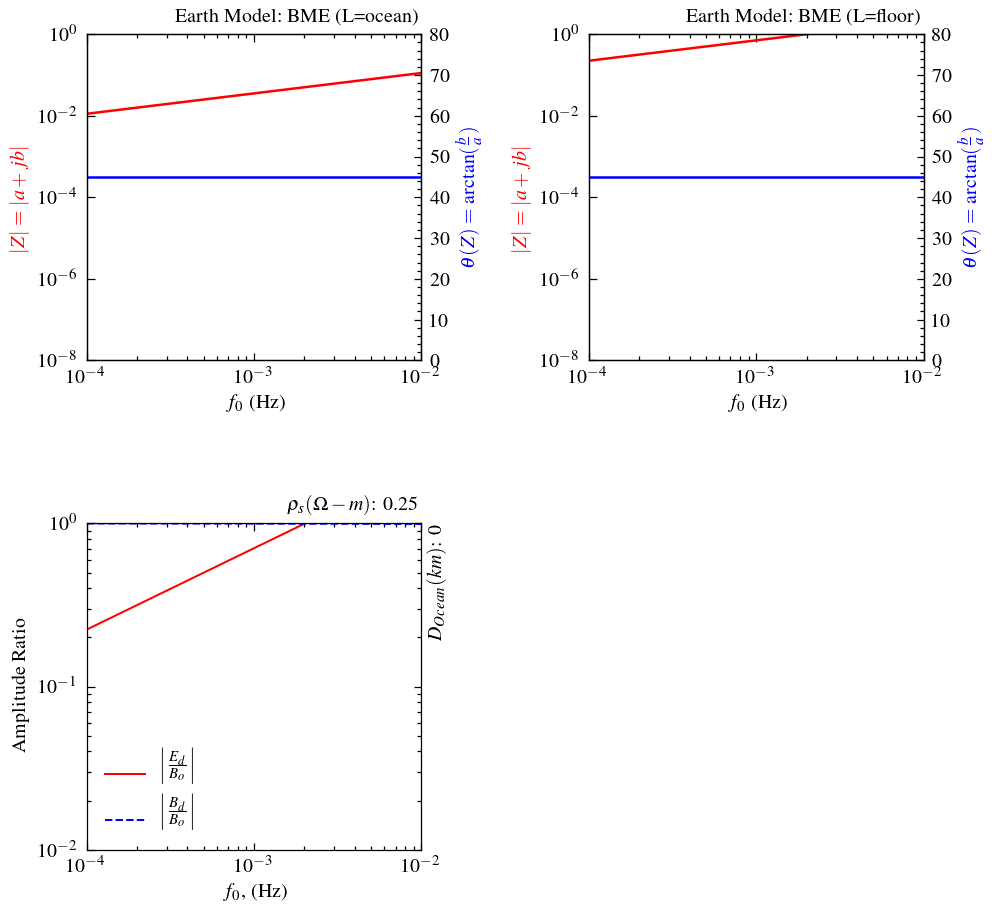

In [11]:
lo100 = BEZpyClass(model_name="BME", ocean_model={"depth":1, "rho":0.25}, flim=[1e-4,1e-2])
lo100.site.resistivities[:] = 100.*np.ones(len(lo100.site.resistivities[:]))
fig = plt.figure(dpi=180, figsize=(6, 6))
lo100.plot_impedance(fig.add_subplot(221), layer="ocean")
lo100.plot_impedance(fig.add_subplot(222), layer="floor")
tf100 = lo100.calcTF(ax=fig.add_subplot(223))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

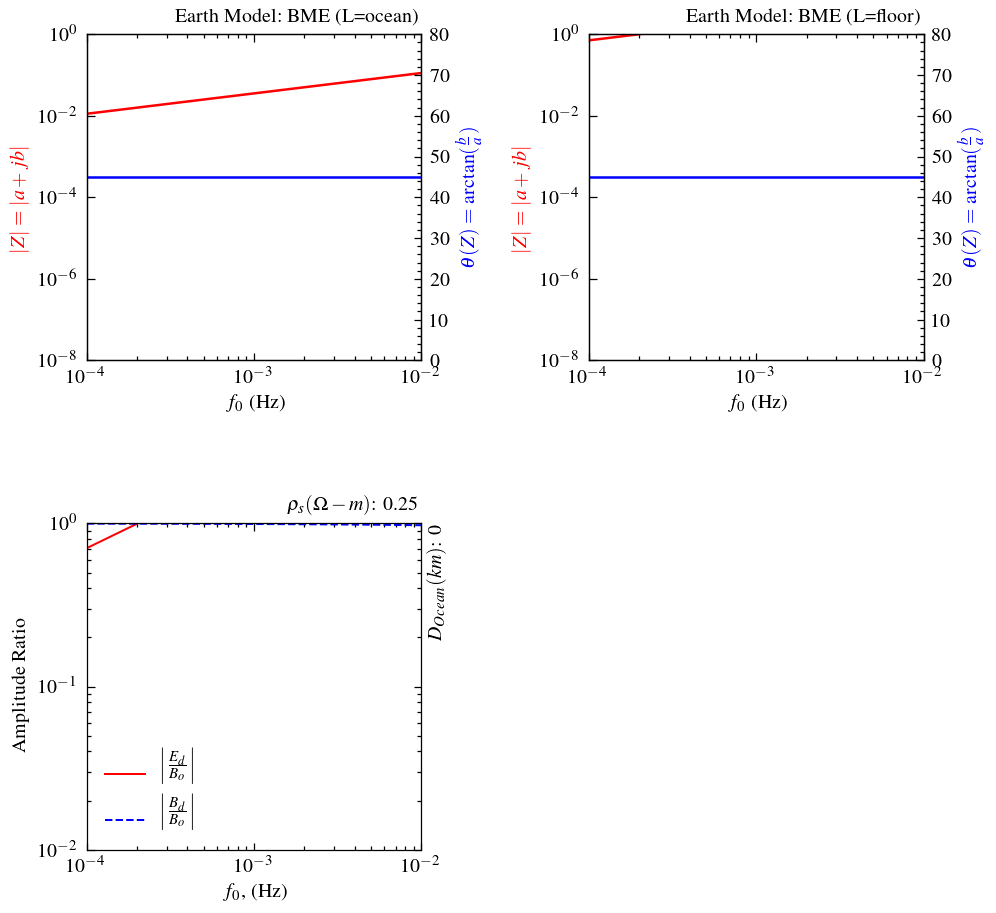

In [12]:
lo1000 = BEZpyClass(model_name="BME", ocean_model={"depth":1, "rho":0.25}, flim=[1e-4,1e-2])
lo1000.site.resistivities[:] = 1000.*np.ones(len(lo1000.site.resistivities[:]))
fig = plt.figure(dpi=180, figsize=(6, 6))
lo1000.plot_impedance(fig.add_subplot(221), layer="ocean")
lo1000.plot_impedance(fig.add_subplot(222), layer="floor")
tf1000 = lo1000.calcTF(ax=fig.add_subplot(223))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

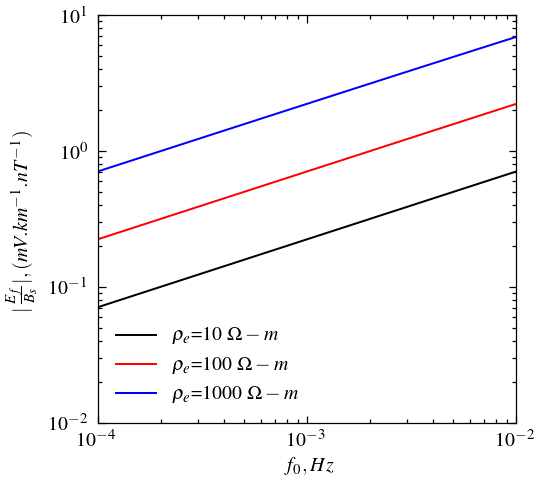

In [13]:
fig = plt.figure(dpi=180, figsize=(3, 3))
ax = fig.add_subplot(111)
ax.loglog(loy.freqs, np.absolute(tfy["Ed2Ho"]), "k", lw=0.8, ls="-", label=r"$\rho_e$=10 $\Omega-m$")
ax.loglog(lo100.freqs, np.absolute(tf100["Ed2Ho"]), "r", lw=0.8, ls="-", label=r"$\rho_e$=100 $\Omega-m$")
ax.loglog(lo1000.freqs, np.absolute(tf1000["Ed2Ho"]), "b", lw=0.8, ls="-", label=r"$\rho_e$=1000 $\Omega-m$")
ax.set_xlabel(r"$f_0, Hz$")
ax.set_ylabel(r"$|\frac{E_f}{B_s}|, (mV.km^{-1}.nT^{-1})$")
ax.set_xlim(1e-4,1e-2)
ax.set_ylim(1e-2, 1e1)
ax.legend(loc=0)